# Исследование закономерностей  определяющих успешность игры.

## План выполнения проекта:
### - Загрузка и изучение данных.
### - Предобработка.
### - Исследовательский анализ данных.
### - Статистический анализ данных. Проверка гипотез.
### - Вывод.

#### Шаг 1. Откроем файл с данными и изучим общую информацию

In [1]:
import pandas as pd
games = pd.read_csv('/datasets/games.csv')

In [1]:
#games

In [3]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


В файле games 16715 строк и 11 столбцов.

Используются типы данных float64(6), object(5).

Есть пропуски в столбцах Name, Year_of_Release, Genre, Critic_Score, User_Score, Rating. Пропуски могли появиться при неправильной выгрузке данных или наоборот загрузке,например, не в том формате или если эти данные не указаны.

#### Шаг 2. Подготовим данные

##### Заменим названия столбцов, приведем к нижнему регистру:

In [4]:
games.columns = ['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating']

In [2]:
#games

##### Обработаем пропуски

В столбцах name, year_of_release, genre, critic_score, user_score, rating мы имеем пропущенные значения. Пропуски могли появиться при некорректной выгрузке или загрузке данных.

Найдем нулевые значения в столбце '**name**':

In [6]:
games[games['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Всего две строки с пропусками, удалим эти строки.

In [7]:
games.dropna(subset = ['name'],inplace = True)

Найдем нулевые значения в столбце '**year_of_release**':

In [8]:
games[games['year_of_release'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


В столбце 'year_of_release' пропущенных значений 269, их тоже можно удалить т.к. это достаточно мало по сравнению с общим количеством строк.

In [9]:
games.dropna(subset = ['year_of_release'],inplace = True)

Найдем нулевые значения в столбце '**genre**':

In [10]:
games[games['genre'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


Пропуски в 'genre' уже удалили вместе с пропусками в 'name'.

Найдем нулевые значения в столбце '**critic_score**':

In [11]:
games[games['critic_score'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Нашли много строк с пропущенными значениями 8461. Пока оставим их.

Найдем нулевые значения в столбце '**user_score**':

In [12]:
games[games['user_score'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Нашли много строк с пропущенными значениями 6613. Пока оставим их.

Найдем нулевые значения в столбце **'rating'**:

In [13]:
games[games['rating'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Нашли много строк с пропущенными значениями 6683. Пока оставим их.

In [14]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null float64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       7983 non-null float64
user_score         9839 non-null object
rating             9768 non-null object
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


##### Преобразуем данные в нужные типы

Для удобства переведем год выпуска в целочисленный тип:

In [15]:
games['year_of_release'] = games['year_of_release'].astype('int')

In [16]:
games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [17]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null int64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       7983 non-null float64
user_score         9839 non-null object
rating             9768 non-null object
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


В столбце 'user_score' нужно перевести данные во float64, но сделаем это позже.

#####  В столбце с рейтингом 'user_score' имеется аббревиатура 'tbd' 

Отдельно разберите это значение и опишите, как его обработать;


In [18]:
games.query('user_score == "tbd"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
718,Just Dance Kids,Wii,2010,Misc,1.52,0.54,0.0,0.18,NaN,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


Думаю, что здесь "tbd" можно интерпретировать как неопределенные, пропущенные значения, т.е. еще не определенные оценки. Их много 2376.

Заменим значения "tbd" на NaN.

In [19]:
import numpy as np

In [20]:
games['user_score'] = games['user_score'].replace('tbd', np.nan)

Проверим, что tbd удалились, а NaN стало больше.

In [21]:
games.query('user_score == "tbd"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [22]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null int64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       7983 non-null float64
user_score         7463 non-null object
rating             9768 non-null object
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


##### Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец:

In [23]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

In [24]:
games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


Как менялась суммарная продажа по годам:

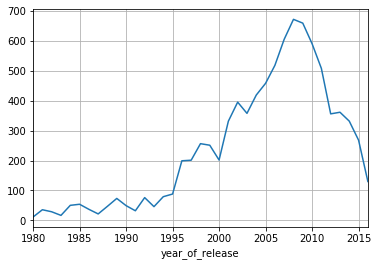

In [25]:
games.groupby('year_of_release')['total_sales'].sum().plot(grid=True)

Видим, что максимум продаж пришелся на 2005 - 2011 годы.

#### Шаг 3. Проведем исследовательский анализ данных


##### Посмотрим, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

In [26]:
games.groupby('year_of_release')['name'].count()

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64

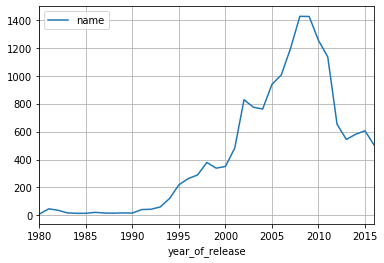

In [27]:
games.pivot_table(index='year_of_release', values='name', aggfunc='count').plot(grid=True)

Больше всего игр выпускалось c 2005 по 2011 год. Суммарные продажи тоже больше в эти же годы.

##### Посмотрим, как менялись продажи по платформам

Посчитаем сколько всего платформ:

In [28]:
len(games['platform'].value_counts())

31

Выберем платформы с наибольшими суммарными продажами:

In [29]:
games.pivot_table(index='platform', values='total_sales', aggfunc='sum').reset_index().sort_values(by='total_sales').tail(6)

,platform,total_sales
15,PS,727.58
4,DS,802.78
26,Wii,891.18
17,PS3,931.34
28,X360,961.24
16,PS2,1233.56


Построим гистограмму для суммарной продажи по платформам:

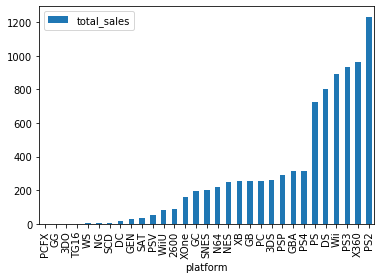

In [30]:
games.pivot_table(index='platform', values='total_sales', aggfunc='sum').reset_index().sort_values(by='total_sales').plot(x='platform', kind='bar')

Видим, что больше всего продаж у платформы PS2

Построим распределение суммарных продаж каждой платформы по годам, возьмем платформы с наибольшими продажами. Берем данные за соответствующий актуальный период. Актуальный период будем считать с 2005 года. Не будем учитывать в работе данные за предыдущие годы.

Автоматизируем вывод графиков.

<Figure size 432x288 with 0 Axes>

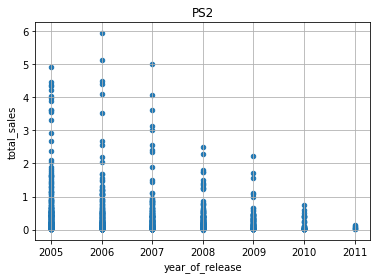

<Figure size 432x288 with 0 Axes>

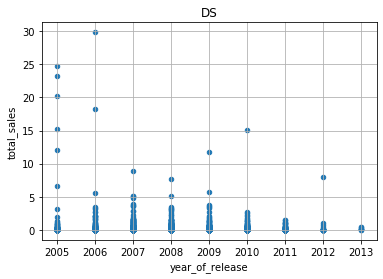

<Figure size 432x288 with 0 Axes>

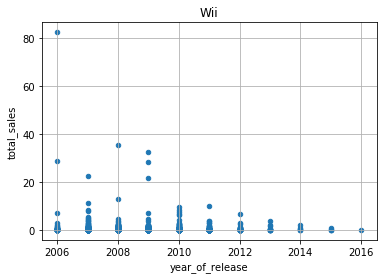

<Figure size 432x288 with 0 Axes>

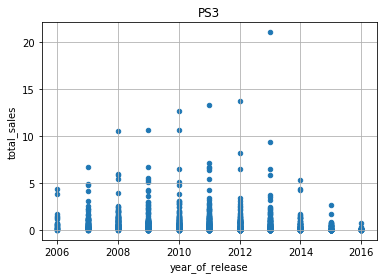

<Figure size 432x288 with 0 Axes>

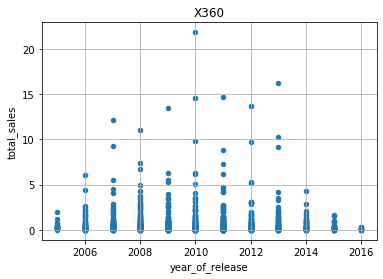

In [31]:
import matplotlib.pyplot as plt
for i in ['PS2', 'DS', 'Wii', 'PS3', 'X360']:
    plt.figure()
    games.query('platform == @i and year_of_release >= 2005').plot(x='year_of_release', y='total_sales', kind='scatter', grid=True, title=i)   

Характерный срок за который появляются новые и исчезают старые платформы около 10 лет. Как видим из графиков за это время продажи существенно снижаются.

##### Какие платформы лидируют по продажам, растут или падают? 

Сделаем сводную таблицу по году выпуска игры и названию платформы и посчитаем суммарную продажу.

In [32]:
games.pivot_table(index=['year_of_release','platform'], values='total_sales', aggfunc='sum')

total_sales
year_of_release platform             
1980            2600            11.38
1981            2600            35.68
1982            2600            28.88
1983            2600             5.84
                NES             10.96
...                               ...
2016            PSV              4.25
                Wii              0.18
                WiiU             4.60
                X360             1.52
                XOne            26.15

[238 rows x 1 columns]

Посмотрим какие платформы актуальны на 2016 год:

In [33]:
games.pivot_table(index=['year_of_release','platform'], values='total_sales', aggfunc='sum').reset_index().query('year_of_release == 2016')

,year_of_release,platform,total_sales
229,2016,3DS,15.14
230,2016,PC,5.25
231,2016,PS3,3.60
232,2016,PS4,69.25
233,2016,PSV,4.25
234,2016,Wii,0.18
235,2016,WiiU,4.60
236,2016,X360,1.52
237,2016,XOne,26.15


Построим графики зависмости суммарной продажи от года выпуска игр на данной платфоме для каждой платформы, актуальной в 2016 году:

(2004, 2017)

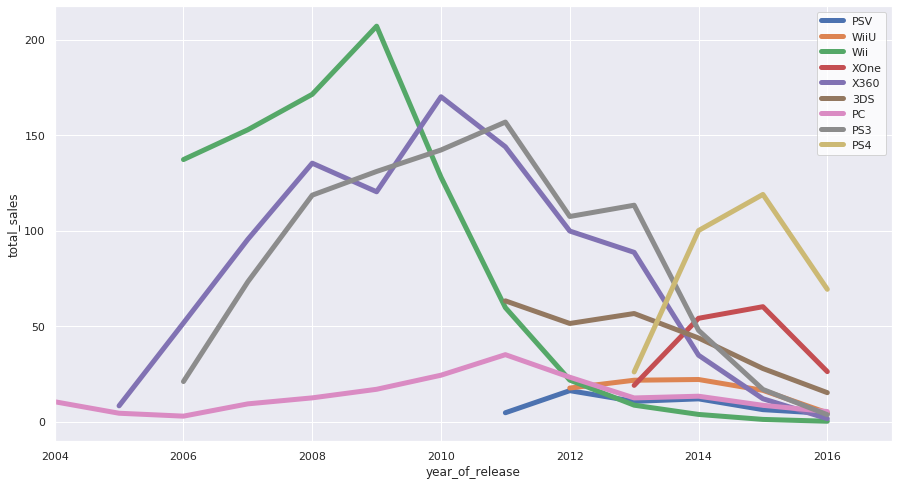

In [34]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.set(rc={'figure.figsize':(15,8)})
for i in ['PSV', 'WiiU', 'Wii', 'XOne', 'X360', '3DS', 'PC', 'PS3', 'PS4']:
    ax = sns.lineplot(x='year_of_release', y='total_sales', label=i, linewidth=5,  data = games.pivot_table(index=['year_of_release','platform'], values='total_sales', aggfunc='sum').reset_index().query('platform == @i'))
    sns.set_style('whitegrid')
sns.set(rc={'figure.figsize':(15,8)})    
plt.xlim((2004, 2017))  

На 2016 год лидер по продажам PS4 69.25 млн, за ним с большой разницей идет XOne. Будем считать их потенциально прибыльными платформами. Из графиков видим, что почти по всем платформам продажи снижаются. На PC продажи примерно одинаковые на протяжении всего актуального периода, но они ниже чем у других в лучшие годы.

##### Построим график «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам. 

Сделаем сводную таблицу:

In [35]:
platform_group = games.pivot_table(index=['platform','name'], values='total_sales', aggfunc='sum')

In [36]:
platform_group

total_sales
platform name                                   
2600     Action Force                       0.54
         Adventures of Tron                 0.67
         Air Raid                           0.77
         Airlock                            0.38
         Alien                              0.79
...                                          ...
XOne     XCOM 2                             0.04
         ZombiU                             0.01
         Zombie Army Trilogy                0.11
         Zoo Tycoon (2013)                  0.36
         Zumba Fitness: World Party         0.24

[16441 rows x 1 columns]

In [37]:
platform_group.reset_index(inplace=True)

Отфильтруем только актуальные платформы:

In [38]:
platform_group = platform_group.query('platform == ("3DS", "PC", "PS3", "PS4", "PSV", "Wii", "WiiU", "X360", "XOne")')

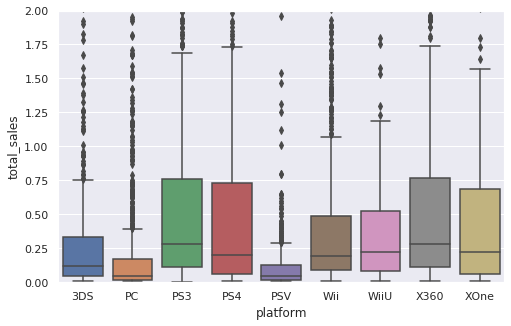

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(num = 3, figsize=(8, 5))
sns.boxplot( x=platform_group["platform"], y=platform_group["total_sales"]);
plt.ylim(0, 2)
plt.show()

Мы построили диаграммы размаха для актуальных платформ в 2016г. Чем больше размах диаграммы для конктретной платформы, тем больше разница в суммарных продажах игр на этой платформе. Суммарые продажи по медиане для разных платформ не так сильно отличаются друг от друга. Значит в среднем(по медиане) на всех платформах суммарная продажа игры не сильно отличается.

##### Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков

Возьмем для изучения PS3. Для удобства запишем данные по PS3 в отдельную таблицу.

In [40]:
PS3 = games.query('platform == "PS3"')

In [41]:
PS3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1306 entries, 16 to 16710
Data columns (total 12 columns):
name               1306 non-null object
platform           1306 non-null object
year_of_release    1306 non-null int64
genre              1306 non-null object
na_sales           1306 non-null float64
eu_sales           1306 non-null float64
jp_sales           1306 non-null float64
other_sales        1306 non-null float64
critic_score       804 non-null float64
user_score         861 non-null object
rating             935 non-null object
total_sales        1306 non-null float64
dtypes: float64(6), int64(1), object(5)
memory usage: 132.6+ KB


У нас имеются пропущенные значения в 'user_score' и 'critic_score'. Их достаточно много, но я не вижу смыла заполнять их медианами итд. Проведем анализ без учета пропусков. 

In [42]:
PS3 = PS3.dropna(subset = ['critic_score', 'user_score']).copy()

Проверим не остались ли пропущенные значения в 'user_score' и 'critic_score':

In [43]:
PS3[PS3['critic_score'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales


In [44]:
PS3[PS3['user_score'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales


Переведем в числовой тип значения в столбце 'user_score':

In [45]:
PS3['user_score'] = pd.to_numeric(PS3['user_score'])

In [46]:
PS3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 775 entries, 16 to 16230
Data columns (total 12 columns):
name               775 non-null object
platform           775 non-null object
year_of_release    775 non-null int64
genre              775 non-null object
na_sales           775 non-null float64
eu_sales           775 non-null float64
jp_sales           775 non-null float64
other_sales        775 non-null float64
critic_score       775 non-null float64
user_score         775 non-null float64
rating             769 non-null object
total_sales        775 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 78.7+ KB


Построим диаграммы рассеяния:

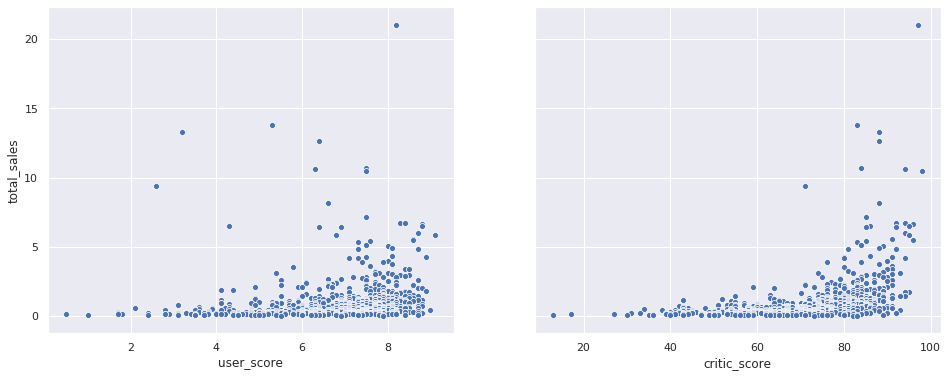

In [47]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(16,6))
ax = sns.scatterplot(x='user_score', y="total_sales", data=PS3, ax=axes[0])
ax = sns.scatterplot(x='critic_score', y="total_sales", data=PS3, ax=axes[1])

Посчитаем корреляцию между отзывами и продажами:

In [48]:
PS3['total_sales'].corr(PS3['critic_score'])

0.42821290412988383

In [49]:
PS3['total_sales'].corr(PS3['user_score'])

0.1439778312570156

Из графиков и коэффициентов корреляции можно сделать вывод о том, что продажи почти не зависят от отзывов. Наверное тоже самое и для других платформ. Проверим это.

Удалим пропуски:

In [50]:
game = games.dropna(subset=['critic_score', 'user_score']).copy()

Возьмем данные только за актуальный период:

In [51]:
game = game.query('year_of_release >= 2005')

Удалим ненужные столбцы:

In [52]:
game = game.drop(['name','year_of_release','genre', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales','rating'], axis=1)

In [53]:
game

,platform,critic_score,user_score,total_sales
0,Wii,76.0,8,82.54
2,Wii,82.0,8.3,35.52
3,Wii,80.0,8,32.77
6,DS,89.0,8.5,29.80
7,Wii,58.0,6.6,28.91
...,...,...,...,...
16660,XOne,74.0,6.7,0.01
16692,PC,80.0,7.6,0.01
16696,PC,61.0,5.8,0.01
16702,PC,60.0,7.2,0.01


Сделаем таблицы с коэффициентами корреляции Пирсона для нескольких платформ:

In [54]:
game

,platform,critic_score,user_score,total_sales
0,Wii,76.0,8,82.54
2,Wii,82.0,8.3,35.52
3,Wii,80.0,8,32.77
6,DS,89.0,8.5,29.80
7,Wii,58.0,6.6,28.91
...,...,...,...,...
16660,XOne,74.0,6.7,0.01
16692,PC,80.0,7.6,0.01
16696,PC,61.0,5.8,0.01
16702,PC,60.0,7.2,0.01


In [55]:
for i in ['3DS', 'PC', 'PS4', 'PSV', 'Wii', 'WiiU', 'X360', 'XOne']:
    print('Таблица корреляции для платформы', i)
    print(game.query('platform == @i').corr())
    print()

Таблица корреляции для платформы 3DS
              critic_score  total_sales
critic_score      1.000000     0.338904
total_sales       0.338904     1.000000

Таблица корреляции для платформы PC
              critic_score  total_sales
critic_score      1.000000     0.277187
total_sales       0.277187     1.000000

Таблица корреляции для платформы PS4
              critic_score  total_sales
critic_score      1.000000     0.405895
total_sales       0.405895     1.000000

Таблица корреляции для платформы PSV
              critic_score  total_sales
critic_score      1.000000     0.131619
total_sales       0.131619     1.000000

Таблица корреляции для платформы Wii
              critic_score  total_sales
critic_score      1.000000     0.170855
total_sales       0.170855     1.000000

Таблица корреляции для платформы WiiU
              critic_score  total_sales
critic_score      1.000000     0.350882
total_sales       0.350882     1.000000

Таблица корреляции для платформы X360
              

Видим, что коэффициент корреляции варьируется для разных платформ. Но в целом, можем сказать что для всех этих платформ продажи не зависят от оценок.

##### Посмотрим на общее распределение игр по жанрам. 

Возьмем данные за актуальный период:

In [56]:
games.query('year_of_release >= 2005').groupby('genre')['total_sales'].agg(['sum', 'count'])

,sum,count
genre,,
Action,1202.04,2574
Adventure,149.81,1065
Fighting,208.07,456
Misc,615.83,1368
Platform,303.06,423
Puzzle,110.28,399
Racing,355.03,638
Role-Playing,550.78,1067
Shooter,758.56,833


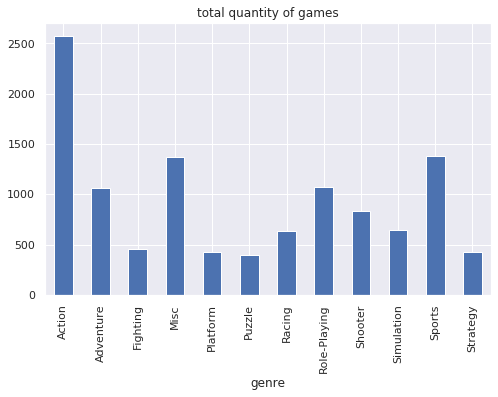

In [57]:
games.query('year_of_release >= 2005').groupby('genre')['total_sales'].agg('count').plot(x='genre', kind='bar', figsize=(8,5), title='total quantity of games')

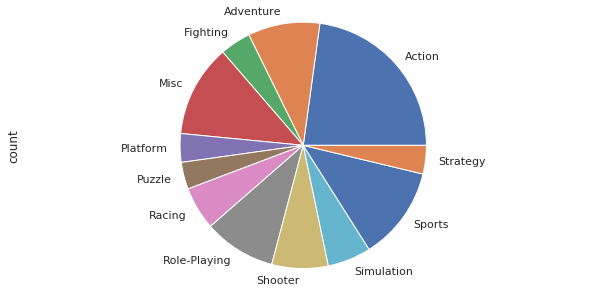

In [97]:
games.query('year_of_release >= 2005').groupby('genre')['total_sales'].agg(['sum', 'count'])['count'].plot(x='genre', kind='pie', radius=10)
plt.axis('equal')
plt.show()

Видим, что больше всего игр делают в жанрах Action и Sports. Меньше всего в Puzzle.

Посмотрим какие жанры самые прибыльные.

Возьмем данные за актуальный период:

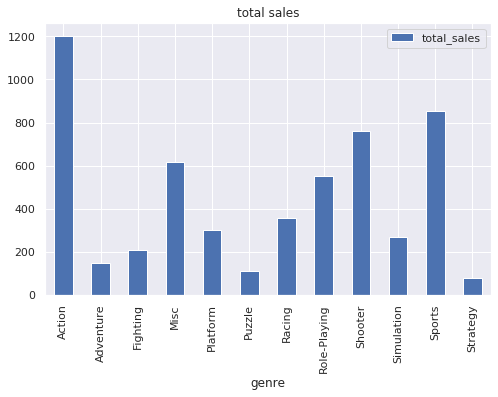

In [59]:
games.query('year_of_release >= 2005').pivot_table(index='genre', values='total_sales', aggfunc='sum').reset_index().plot(x='genre', kind='bar', figsize=(8,5), title='total sales')

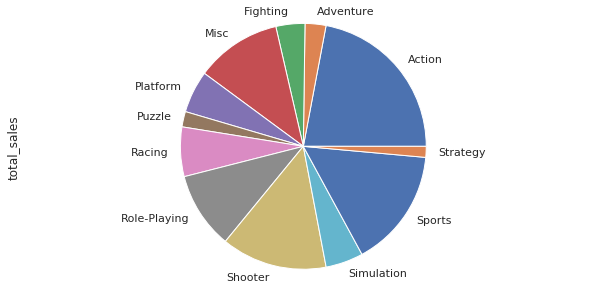

In [96]:
games.query('year_of_release >= 2005').groupby('genre')['total_sales'].sum().plot(x='genre', y='total_sales',  kind='pie', radius=10)
plt.axis('equal')
plt.show()

Cамые прибыльные жанры - Action и Sports. Самые низкие продажи - Strategy, Puzzle, Adventure.

#### Шаг 4. Составим портрет пользователя каждого региона. 

##### Определим для пользователя каждого региона (NA, EU, JP) самые популярные платформы (топ-5). 

В Северной Америке:

In [61]:
na_sales_platform = games.query('year_of_release >= 2005').groupby('platform')['na_sales'].sum().reset_index().sort_values(by='na_sales', ascending=False).head(5)

In [62]:
na_sales_platform['ratio'] = na_sales_platform['na_sales'] / na_sales_platform['na_sales'].sum()

In [63]:
na_sales_platform

,platform,na_sales,ratio
13,X360,595.74,0.291285
11,Wii,486.87,0.238054
7,PS3,390.13,0.190753
2,DS,371.98,0.181879
6,PS2,200.49,0.098029


В Европе:

In [64]:
eu_sales_platform = games.query('year_of_release >= 2005').groupby('platform')['eu_sales'].sum().reset_index().sort_values(by='eu_sales', ascending=False).head(5)

In [65]:
eu_sales_platform['ratio'] = eu_sales_platform['eu_sales'] / eu_sales_platform['eu_sales'].sum()

In [66]:
eu_sales_platform

,platform,eu_sales,ratio
7,PS3,327.21,0.277433
13,X360,268.32,0.227502
11,Wii,258.32,0.219023
2,DS,184.48,0.156416
8,PS4,141.09,0.119627


В Японии:

In [67]:
jp_sales_platform = games.query('year_of_release >= 2005').groupby('platform')['jp_sales'].sum().reset_index().sort_values(by='jp_sales', ascending=False).head(5)

In [68]:
jp_sales_platform['ratio'] = jp_sales_platform['jp_sales'] / jp_sales_platform['jp_sales'].sum()

In [69]:
jp_sales_platform

,platform,jp_sales,ratio
2,DS,171.35,0.347207
0,3DS,100.62,0.203886
7,PS3,79.41,0.160909
9,PSP,73.85,0.149642
11,Wii,68.28,0.138356


Здесь учтены данные только за актуальный период.

Для наглядности построим графики:

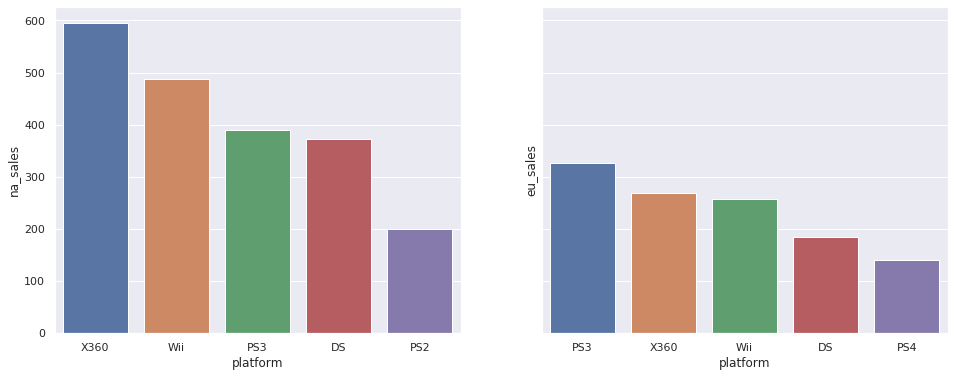

In [70]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(16,6))
sns.barplot(x='platform', y = "na_sales", data=na_sales_platform, ax=axes[0])
sns.barplot(x='platform', y = "eu_sales", data=eu_sales_platform, ax=axes[1])

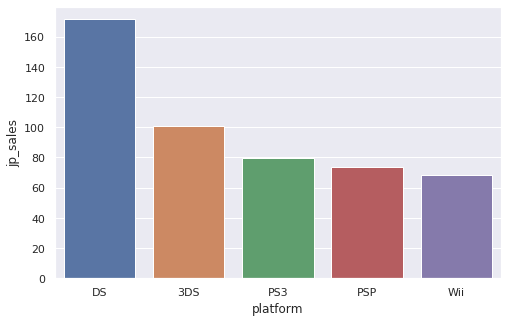

In [95]:
sns.barplot(x='platform', y = "jp_sales", data=jp_sales_platform)
sns.set(rc={'figure.figsize':(10,5)})  

В Северной Америке самая популярная платформа X360, в Европе PS3. В целом топ-5 самых популярных платформ в Северной Америке и Европе схожи.  В Европе в топ-5 платформ входит PS4, а в Северной Америке ее нет в пятерке популярнейших платформ, зато есть PS2. В Японии топ 5 платформ отличается. Самая популярная платформа в Японии - DS.

В Северной Америке рынок намного больше, больше суммарные продажи.

##### Самые популярные жанры (топ-5)

В Северной Америке:

In [72]:
na_sales_genre = games.query('year_of_release >= 2005').groupby('genre')['na_sales'].sum().reset_index().sort_values(by='na_sales', ascending=False).head(5)

In [73]:
na_sales_genre['ratio'] = na_sales_genre['na_sales'] / na_sales_genre['na_sales'].sum()

In [74]:
na_sales_genre

,genre,na_sales,ratio
0,Action,580.04,0.299396
10,Sports,432.70,0.223344
8,Shooter,400.96,0.206961
3,Misc,311.82,0.160950
7,Role-Playing,211.85,0.109349


В Европе:

In [75]:
eu_sales_genre = games.query('year_of_release >= 2005').groupby('genre')['eu_sales'].sum().reset_index().sort_values(by='eu_sales', ascending=False).head(5)

In [76]:
eu_sales_genre['ratio'] = eu_sales_genre['eu_sales'] / eu_sales_genre['eu_sales'].sum()

In [77]:
eu_sales_genre

,genre,eu_sales,ratio
0,Action,372.58,0.315105
10,Sports,265.61,0.224636
8,Shooter,248.07,0.209802
3,Misc,167.09,0.141314
6,Racing,129.05,0.109142


В Японии:

In [78]:
jp_sales_genre = games.query('year_of_release >= 2005').groupby('genre')['jp_sales'].sum().reset_index().sort_values(by='jp_sales', ascending=False).head(5)

In [79]:
jp_sales_genre['ratio'] = jp_sales_genre['jp_sales'] / jp_sales_genre['jp_sales'].sum()

In [80]:
jp_sales_genre

,genre,jp_sales,ratio
7,Role-Playing,179.60,0.399724
0,Action,108.39,0.241237
3,Misc,72.49,0.161336
10,Sports,52.51,0.116868
4,Platform,36.32,0.080835


Здесь учтены данные только за актуальный период.

Для наглядности построим графики:

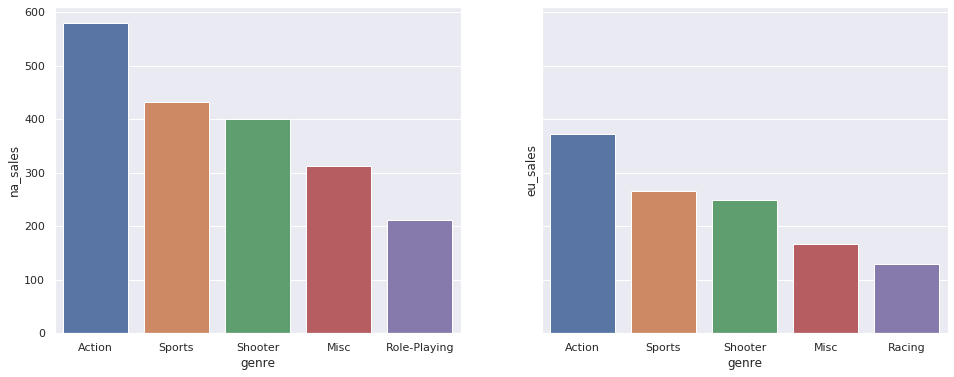

In [81]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(16,6))
sns.barplot(x='genre', y = "na_sales", data=na_sales_genre, ax=axes[0])
sns.barplot(x='genre', y = "eu_sales", data=eu_sales_genre, ax=axes[1])

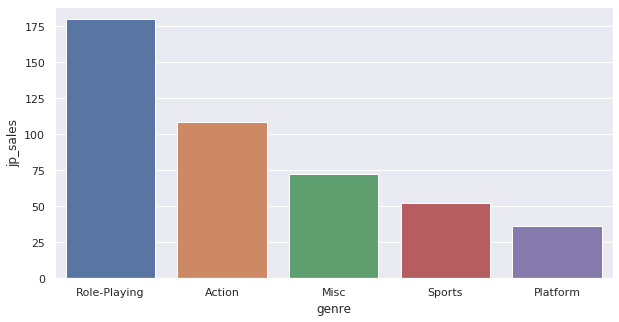

In [82]:
sns.barplot(x='genre', y = "jp_sales", data=jp_sales_genre)
sns.set(rc={'figure.figsize':(8,5)})  

В Европе и Северной Америке совпадают наиболее популярные жанры. Это Action, Sports, Shooter.  В Японии на первом месте Role-Playing, дальше идут Action, Sports также как в Европе и Северной Америке.

##### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Проверим сколько пропущенных значений в столбце 'rating':

In [83]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null int64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       7983 non-null float64
user_score         7463 non-null object
rating             9768 non-null object
total_sales        16444 non-null float64
dtypes: float64(6), int64(1), object(5)
memory usage: 1.6+ MB


In [84]:
games[games['rating'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN,24.67
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


Их много, но я не вижу смысла заменять их медианой, а других подходящих идей для замены нет. Поэтому в дальнейшем анализе не будем учитывать эти пропуски. Также будем учитывать данные только за актуальный период:

In [85]:
rating = games.query('year_of_release >= 2005').dropna(subset = ['rating']).copy()

In [86]:
rating.groupby('rating')['na_sales', 'eu_sales', 'jp_sales'].sum()

,na_sales,eu_sales,jp_sales
rating,,,
AO,1.26,0.61,0.00
E,873.10,508.71,147.33
E10+,343.02,181.92,39.05
EC,1.53,0.11,0.00
M,607.34,414.11,46.23
RP,0.00,0.03,0.00
T,479.08,258.17,91.32


Построим графики для наглядности:

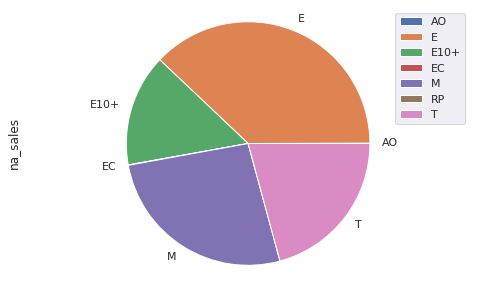

In [87]:
rating.groupby('rating')['na_sales', 'eu_sales', 'jp_sales'].sum().plot(x='rating', y='na_sales',  kind='pie', radius=10)
plt.axis('equal')
plt.show()

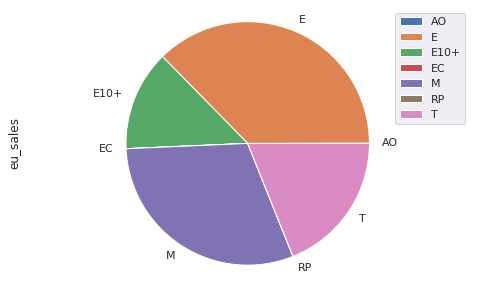

In [88]:
rating.groupby('rating')['na_sales', 'eu_sales', 'jp_sales'].sum().plot(x='rating', y='eu_sales',  kind='pie', radius=10)
plt.axis('equal')
plt.show()

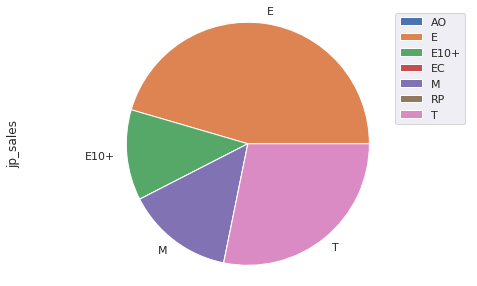

In [89]:
rating.groupby('rating')['na_sales', 'eu_sales', 'jp_sales'].sum().plot(x='rating', y='jp_sales',  kind='pie', radius=10)
plt.axis('equal')
plt.show()

Видим, что **наиболее популярный рейтинг ESRB** во всех регионах одинаковый:

"E" «Для всех»: Содержание подходит для возрастной категории старше 6 лет, такие игры могут понравиться и взрослым. 

"M" - «От 17 лет». Материалы игры не подходят для возрастной категории младше 17 лет. 

"T" -  «Подросткам 13—19 лет». Игра подходит для подростков старше 13 лет. 

**Наименее популярные рейтинги:**

EC - «Для детей младшего возраста»: Игра подходит для детей от 3 лет и старше.

AO - «Только для взрослых». Содержание игры только для взрослых.

#### Шаг 5. Проверим гипотезы

Не будем учитывать пропущенные значения в столбце 'user_score'.

In [90]:
games_dropna = games[games['user_score'].notnull()].copy()

Переведем в численный тип:

In [91]:
games_dropna['user_score'] = pd.to_numeric(games_dropna['user_score']).copy()

Учтем данные только за актуальный период:

In [92]:
games_dropna = games_dropna.query('year_of_release >= 2005')

#####  Проверим гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые

**Нулевая гипотеза H₀**: Средние пользовательские рейтинги платформ Xbox One и PC равны. H₀ всегда формулируется так, чтобы использовать знак равенства. 

**Альтернативная гипотеза H₁**: Средние пользовательские рейтинги платформ Xbox One и PC различаются.

Для проверки гипотезы используем метод scipy.stats.ttest_ind (array1, array2, equal_var). Пороговое значение alpha зададим равным 5%. Так как нам не важно, чей рейтинг больше или меньше, то тест двухсторонний.

In [93]:
from scipy import stats as st
alpha = .05
results = st.ttest_ind(
    games_dropna.query('platform == "XOne"')['user_score'], 
    games_dropna.query('platform == "PC"')['user_score'])
    
print('p-значение: ', results.pvalue)
    
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.0036925827463950033
Отвергаем нулевую гипотезу


Средние пользовательские рейтинги платформ Xbox One и PC все таки различаются.

##### Проверим гипотезу о том, что средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные.

**Нулевая гипотеза H₀**: Средние пользовательские рейтинги жанров Action и Sports равны. H₀ всегда формулируется так, чтобы использовать знак равенства. 

**Альтернативная гипотеза H₁**: Средние пользовательские рейтинги жанров Action и Sports разные.

Для проверки гипотезы используем метод scipy.stats.ttest_ind (array1, array2, equal_var). Пороговое значение alpha зададим равным 5%. Так как нам не важно, чей рейтинг больше или меньше, то тест двухсторонний.

In [94]:
from scipy import stats as st
alpha = .05
results = st.ttest_ind(
    games_dropna.query('genre == "Action"')['user_score'], 
    games_dropna.query('genre == "Sports"')['user_score'])
    
print('p-значение: ', results.pvalue)
    
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  6.299384839540833e-10
Отвергаем нулевую гипотезу


Вероятность того, что средние пользовательские рейтинги жанров Action и Sports равны близка к 0. Значит средние пользовательские рейтинги жанров Action и Sports не равны.

#### Шаг 6. Вывод

В данном проекте была произведена работа по исследованию закономерностей определяющих успешность игры. 

Были найдены следующие закономерности:

1. Больше всего продаж за все время у платформы PS2. Это одна из самых популярных платформ во всех регионах за все время. 
2. Больше всего игр выпускалось c 2005 по 2011 год. Суммарные продажи тоже больше в эти годы. На 2016г лидер по продажам PS4, за ней с большой разницей идет XOne. По всем платформам продажи снижаются. На PC продажи примерно одинаковые на протяжении всего актуального периода, но они ниже чем у других в лучшие годы.
3. Характерный срок за который появляются новые и исчезают старые платформы около 10 лет.    
4. Продажи не зависят от отзывов, это верно для всех изученных платформ. 
5. За выбранный нами актуальный период в Северной Америке самая популярная платформа X360, в Европе PS3. В целом топ-5 самых популярных платформ в Северной Америке и Европе схожи. В Европе в топ-5 платформ входит PS4, а в Северной Америке ее нет в пятерке популярнейших платформ, зато есть PS2. В Японии топ 5 платформ отличается. Самая популярная платформа в Японии - DS.   
6. В Северной Америке рынок намного больше, больше суммарные продажи.
7. Cамые прибыльные жанры по продажам - Action и Sports, больше всего игр делают в этих жанрах, потому что они самые популярные. Но это одни из самых дорогих в произвостве игр.
8. Самые популярные жанры в Европе и Северной Америке совпадают. Это Action, Sports, Shooter. А вот в Японии на первом месте Role-Playing, дальше идут Action, Sports также как в Европе и Северной Америке.
9. Во всех регионах самый популярный рейтинг ESRB одинаковый - это "E" «Для всех».
    
Эти закономерности позволят сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
